## Observations and Insights
#### Add your analysis here
---

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
main_df = pd.merge(study_results,mouse_metadata,on ='Mouse ID' )

# Display the data table for preview
main_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [35]:
# Check the number of mice.
mouse_ids = main_df['Mouse ID'].unique()
mice_count = len(mouse_ids)

print('Mice count: ',mice_count)

Mice count:  249


In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dup_rows = main_df[main_df.duplicated(['Mouse ID','Timepoint'])]
dup_mice = dup_rows['Mouse ID'].unique()

for x in dup_mice:
    print(x)
    
dup_mice[0]

g989


'g989'

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 


main_df.loc[main_df['Mouse ID'] == dup_mice[0],:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = main_df.loc[main_df['Mouse ID'] != dup_mice[0],:]

In [39]:
# Check the number of mice in the clean DataFrame.
mouse_ids = clean_df['Mouse ID'].unique()
mice_count = len(mouse_ids)

print('Mice count: ',mice_count)

Mice count:  248


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

DR1_df = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.

mean_s = DR1_df.mean()
median_s = DR1_df.median()
var_s = DR1_df.var()
std_s = DR1_df.std()
sem_s = DR1_df.sem()

SS = pd.concat([mean_s,median_s,median_s,std_s,sem_s],axis=1, join='inner')
#SS.rename(inplace = true, [])
SS 


,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,52.431737,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

DR_df = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', st.sem])

# Use method to produce everything with a single groupby function

DR_df

C:\Users\spaki\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\spaki\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\spaki\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

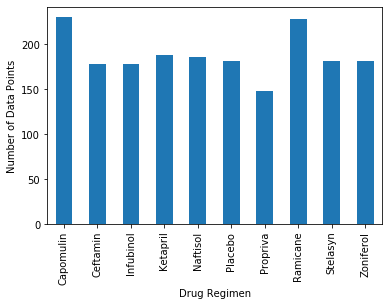

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

DM_df = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').count()

myPlot = DM_df.plot(kind='bar',legend=False)

plt.ylabel('Number of Data Points')

plt.show()

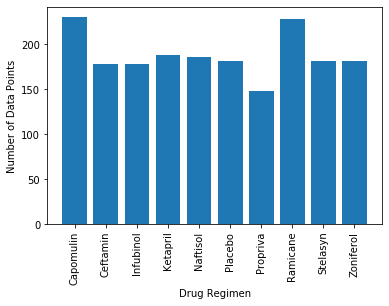

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(DM_df))


plt.bar(x_axis,DM_df['Tumor Volume (mm3)'])

plt.xticks(x_axis,DM_df.index,rotation =90)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

plt.show()



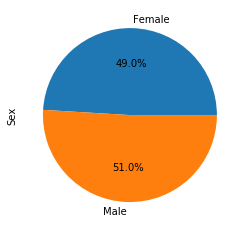

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = clean_df[['Mouse ID','Sex']].groupby('Sex').count()

myPlot = sex_df.plot(kind='pie', y = 'Mouse ID',legend= False,autopct="%1.1f%%")

plt.ylabel('Sex')

print()

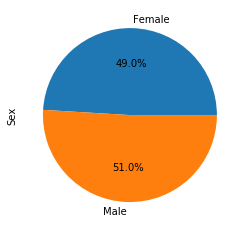

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_df['Mouse ID'],labels =sex_df.index,autopct="%1.1f%%")
plt.ylabel('Sex')

print()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse

maxtime_df = clean_df[['Mouse ID','Timepoint']].groupby('Mouse ID').max()
maxtime_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_df = pd.merge(maxtime_df,clean_df,on = ['Mouse ID','Timepoint'])

combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [47]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_df = combined_df.loc[combined_df['Drug Regimen'] == drug,:'Tumor Volume (mm3)']
    

    # add subset to tumor volume data list
    tumor_vol_list.append(mice_df['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_df['Tumor Volume (mm3)'].quantile([0.25,0.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq-1.5*iqr
    upper_bound = upperq +1.5*iqr
    

    outlier = mice_df.loc[(mice_df['Tumor Volume (mm3)'] > upper_bound) | (mice_df['Tumor Volume (mm3)'] < lower_bound),'Tumor Volume (mm3)']
    
    #tumor_vol_list.append(outlier)
    
    print(f"{drug}'s potential outliers:", outlier)
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


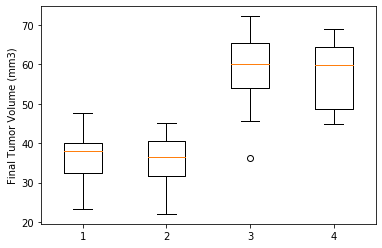

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

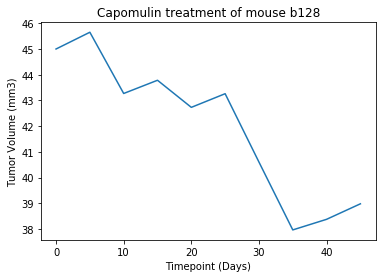

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

drug = 'Capomulin'
mouse = 'b128'

drug_df = main_df.loc[(main_df['Drug Regimen'] == drug) & (main_df['Mouse ID'] == mouse),:]



plt.plot(drug_df.Timepoint,drug_df['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"{drug} treatment of mouse {mouse}")

plt.show()


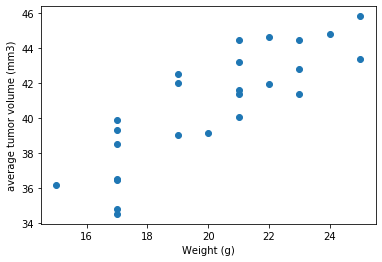

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
my_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin',['Mouse ID','Tumor Volume (mm3)','Weight (g)']].groupby('Mouse ID').mean()

x_values = my_df['Weight (g)']
y_values = my_df['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)

plt.xlabel('Weight (g)')
plt.ylabel('average tumor volume (mm3)')

plt.show()

## Correlation and Regression

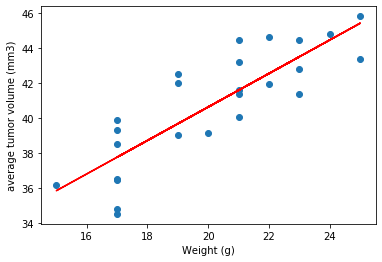

In [56]:
# Calculate the correlation coefficient and linear regression model

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# for mouse weight and average tumor volume for the Capomulin regimen
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('average tumor volume (mm3)')

plt.show()